In [ ]:
%tensorflow_version 2.x

## Testing for GPU

To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU
 

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 2. Getting slightly more advanced


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.utils import plot_model

import numpy as np

In [ ]:
print(tf.keras.__version__)
print(tf.__version__)

2.3.0-tf
2.2.0


### Lets import our dataset

In [ ]:
from tensorflow.python.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Setting up our Network Hyper Parameters

In [ ]:
# Training Parameters for basic MNIST
learning_rate = 0.001 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### This time we are going to make a functional model instead of a sequential model

In [ ]:
Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_4")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [ ]:
# This creates a model that includes our input, 4 dense hidden layers, output layer
model = Model(Inp, output, name='our_model')


In [ ]:
model.summary()

Model: "our_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total params: 361,150
Trainable params: 361,150
Non-trainable params: 0
___________________________________________________

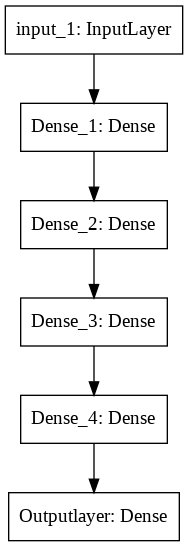

In [ ]:
plot_model(model, to_file="new_model.png")

In [ ]:
opt = SGD(lr = learning_rate)

In [ ]:
model.compile(loss= tf.keras.losses.categorical_crossentropy,
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 2.2634 - accuracy: 0.2064 - val_loss: 2.2153 - val_accuracy: 0.3489
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 2.1539 - accuracy: 0.4167 - val_loss: 2.0728 - val_accuracy: 0.4662
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 1.9628 - accuracy: 0.5016 - val_loss: 1.8209 - val_accuracy: 0.5354
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 1.6578 - accuracy: 0.5635 - val_loss: 1.4591 - val_accuracy: 0.6162
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 1.2872 - accuracy: 0.6825 - val_loss: 1.0888 - val_accuracy: 0.7457
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.9702 - accuracy: 0.7700 - val_loss: 0.8258 - val_accuracy: 0.8047
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7628 - accuracy: 0.8138 - val_loss: 0.6651 - val_accuracy: 0.8340
Epoch 

In [ ]:
history.history

{'accuracy': [0.20643332600593567,
  0.41670000553131104,
  0.5016166567802429,
  0.5635166764259338,
  0.6824833154678345,
  0.7699833512306213,
  0.8137500286102295,
  0.838450014591217,
  0.8544166684150696,
  0.8652333617210388],
 'loss': [2.263413906097412,
  2.1538643836975098,
  1.9627900123596191,
  1.6577656269073486,
  1.287200927734375,
  0.9701849222183228,
  0.7628499865531921,
  0.6366851329803467,
  0.5570818185806274,
  0.5032885074615479],
 'val_accuracy': [0.3488999903202057,
  0.46619999408721924,
  0.5353999733924866,
  0.6161999702453613,
  0.7457000017166138,
  0.8047000169754028,
  0.8339999914169312,
  0.8561000227928162,
  0.866100013256073,
  0.8766999840736389],
 'val_loss': [2.21530818939209,
  2.0728468894958496,
  1.820908546447754,
  1.459071159362793,
  1.0888080596923828,
  0.8257921934127808,
  0.6650918126106262,
  0.566519558429718,
  0.5025451183319092,
  0.4572673738002777]}

In [ ]:
def plot_train(hist):
    h = hist.history
    if 'accuracy' in h:
        meas='accuracy'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

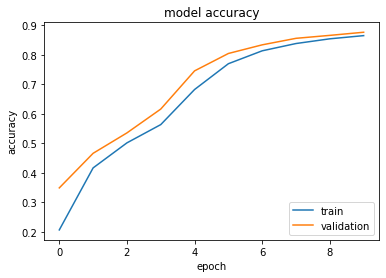

In [ ]:
plot_train(history)

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2638 - accuracy: 0.9243 - val_loss: 0.2509 - val_accuracy: 0.9286
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2597 - accuracy: 0.9253 - val_loss: 0.2470 - val_accuracy: 0.9296
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2559 - accuracy: 0.9263 - val_loss: 0.2435 - val_accuracy: 0.9313
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2521 - accuracy: 0.9275 - val_loss: 0.2401 - val_accuracy: 0.9315
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2485 - accuracy: 0.9280 - val_loss: 0.2372 - val_accuracy: 0.9333
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2450 - accuracy: 0.9291 - val_loss: 0.2344 - val_accuracy: 0.9333
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2416 - accuracy: 0.9301 - val_loss: 0.2312 - val_accuracy: 0.9345
Epoch 

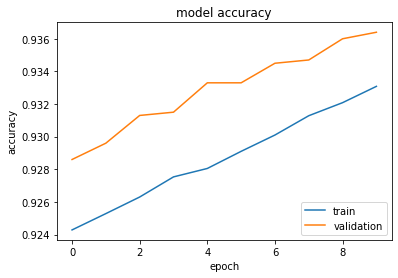

In [ ]:
plot_train(history)

## Dropout


Now lets add dropput

Dropout(0.3) = randomly dropout 30% of the units each pass through

In [ ]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [ ]:
model = Model(Inp, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010  

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 2.2651 - accuracy: 0.1520 - val_loss: 2.1326 - val_accuracy: 0.3729
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 2.1130 - accuracy: 0.2889 - val_loss: 1.9312 - val_accuracy: 0.6207
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 1.9213 - accuracy: 0.4324 - val_loss: 1.6512 - val_accuracy: 0.7143
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 1.6696 - accuracy: 0.5417 - val_loss: 1.3275 - val_accuracy: 0.7623
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 1.4073 - accuracy: 0.6093 - val_loss: 1.0466 - val_accuracy: 0.7921
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 1.1976 - accuracy: 0.6533 - val_loss: 0.8540 - val_accuracy: 0.8117
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 1.0450 - accuracy: 0.6885 - val_loss: 0.7303 - val_accuracy: 0.8270
Epoch 

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7515 - accuracy: 0.7668 - val_loss: 0.5138 - val_accuracy: 0.8651
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7160 - accuracy: 0.7788 - val_loss: 0.4867 - val_accuracy: 0.8687
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6849 - accuracy: 0.7906 - val_loss: 0.4635 - val_accuracy: 0.8751
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6538 - accuracy: 0.7995 - val_loss: 0.4442 - val_accuracy: 0.8797
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6320 - accuracy: 0.8061 - val_loss: 0.4281 - val_accuracy: 0.8831
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6084 - accuracy: 0.8124 - val_loss: 0.4136 - val_accuracy: 0.8847
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.8211 - val_loss: 0.4002 - val_accuracy: 0.8894
Epoch 

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5289 - accuracy: 0.8410 - val_loss: 0.3600 - val_accuracy: 0.8997
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5164 - accuracy: 0.8443 - val_loss: 0.3528 - val_accuracy: 0.9017
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5030 - accuracy: 0.8490 - val_loss: 0.3447 - val_accuracy: 0.9032
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4910 - accuracy: 0.8532 - val_loss: 0.3373 - val_accuracy: 0.9064
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4859 - accuracy: 0.8546 - val_loss: 0.3311 - val_accuracy: 0.9079
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4774 - accuracy: 0.8586 - val_loss: 0.3254 - val_accuracy: 0.9085
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4666 - accuracy: 0.8613 - val_loss: 0.3205 - val_accuracy: 0.9093
Epoch 

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4384 - accuracy: 0.8692 - val_loss: 0.3007 - val_accuracy: 0.9140
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4325 - accuracy: 0.8712 - val_loss: 0.2969 - val_accuracy: 0.9144
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4273 - accuracy: 0.8731 - val_loss: 0.2924 - val_accuracy: 0.9159
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4206 - accuracy: 0.8746 - val_loss: 0.2888 - val_accuracy: 0.9171
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4099 - accuracy: 0.8779 - val_loss: 0.2849 - val_accuracy: 0.9174
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4107 - accuracy: 0.8785 - val_loss: 0.2818 - val_accuracy: 0.9174
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4063 - accuracy: 0.8801 - val_loss: 0.2790 - val_accuracy: 0.9187
Epoch 

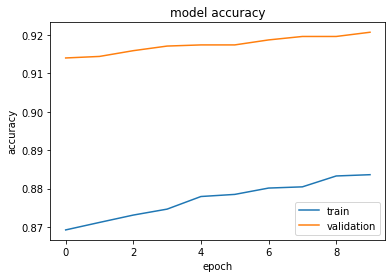

In [ ]:
plot_train(history)

In [ ]:
x_test[0:10].shape

(10, 784)

In [ ]:
result = model.predict(x_test[0:10])

In [ ]:
result.shape 

(10, 10)

In [ ]:
result

array([[8.93360047e-05, 2.01946459e-05, 2.11146267e-04, 1.02902378e-03,
        1.29878845e-05, 9.65690997e-05, 8.84559256e-07, 9.96313155e-01,
        4.42491255e-05, 2.18259916e-03],
       [1.30351298e-02, 3.23322194e-04, 9.22086298e-01, 2.51783375e-02,
        1.35860701e-05, 9.36193578e-03, 2.55767796e-02, 3.61061757e-05,
        4.32652747e-03, 6.20747815e-05],
       [5.33140301e-05, 9.87121999e-01, 3.25093069e-03, 1.60659407e-03,
        2.33560728e-04, 5.23887924e-04, 9.69686836e-04, 2.05303868e-03,
        3.77331674e-03, 4.13717848e-04],
       [9.98877823e-01, 3.96054922e-09, 2.16205182e-04, 1.46764678e-05,
        3.80523943e-07, 4.92744497e-04, 5.69476724e-05, 2.96567945e-04,
        3.27956805e-05, 1.18129192e-05],
       [2.13643187e-04, 3.25707661e-04, 4.12132777e-03, 6.36323704e-04,
        9.08860385e-01, 2.35756952e-03, 3.06618423e-03, 3.89545062e-03,
        5.60481288e-03, 7.09185004e-02],
       [7.69497819e-06, 9.95278955e-01, 8.18027882e-04, 5.87331015e-04,
   

### Lets argmax the predictions

In [ ]:
import numpy as np

np.argmax(result,axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
y_test[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Let's argmax the One Hot Encoded vector of the test set

In [ ]:
np.argmax(y_test[0:10],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2685936987400055
Test accuracy: 0.9207000136375427


### Build a network with at least 7 layers and uses dropout